## 花哨的索引


    在前面的小节中，我们看到了如何利用简单的索引值（如arr[0]）、切片（如arr[:5]）和布尔掩码（如arr[arr > 0]）获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。
    
 - 花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100,size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
# 假设我们想获得三个不同的元素，可以用以下方式实现
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
# 另外一种方法是通过传递索引的单个列表或数组来获得同样的结果
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [9]:
ind = np.array([[3,7],[4,5]])
x[ind]

# 利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

array([[71, 86],
       [60, 20]])

In [10]:
np.random.seed(0)
arr = np.random.randint(20,size = (3,4))
arr

array([[12, 15,  0,  3],
       [ 3,  7,  9, 19],
       [18,  4,  6, 12]])

In [12]:
# 和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：

row = np.array([0,1,2])
col = np.array([2,1,3])
arr[row,col]

#这里需要注意，结果的第一个值是X[0, 2]，第二个值是X[1, 1]，第三个值是X[2, 3]。
# 这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状。


array([ 0,  7, 12])

In [13]:
# 组合索引
import numpy as np
x = np.arange(12).reshape((3,4))
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [14]:
x[2,[2,0,1]]

array([10,  8,  9])

In [19]:
# 可以将花式索引和切片组合使用

x[1:,[2,0,1]]

None


In [22]:
x[:,np.newaxis]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [18]:
# 更可以将花哨的索引和掩码组合使用
mask = np.array([1,0,1,0],dtype=bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 示例：选择随机点

- 花哨的索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个N×D的矩阵，表示在D个维度的N个点。

In [23]:
# 以下是一个二维正态分布的点组成的数组
mean = [0,0]
cov = [[1,2],[2,5]]
X = rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

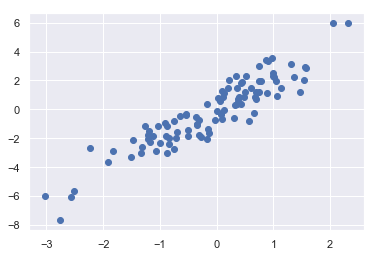

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set() # 设置绘图风格

plt.scatter(X[:,0],X[:,1])

## 用花哨的索引修改值

- 正如花哨的索引可以被用于获取部分数组，它也可以被用于修改部分数组

In [25]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [26]:
# 可以用任何的赋值语句实现
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [27]:
# 注意操作中重复的索引会导致一些出乎意料的结果产生
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

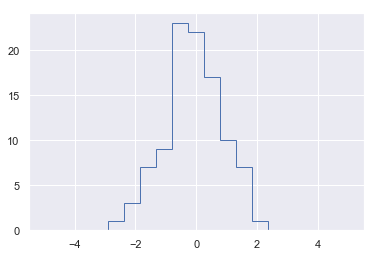

In [31]:
# 示例：数据区间划分
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.randn(100)
#print(x)
# 手动计算直方图
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
np.add.at(counts,i,1)

# 画出结果图
plt.hist(x,bins,histtype="step")

In [32]:
print("Numpy routine:")
%timeit counts,edges = np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

# 可以看到，我们一行代码的算法比NumPy优化过的算法快好几倍！
# 这是如何做到的呢？如果你深入np.histogram源代码（可以在IPython中输入np.histogram??查看源代码），
# 就会看到它比我们前面用过的简单的搜索和计数方法更复杂。这是由于NumPy的算法更灵活（需要适应不同场景），
# 因此在数据点比较大时更能显示出其良好性能：


Numpy routine:
137 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
41.5 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 数组的排序

    这一节将介绍用于排序NumPy数组的相关算法，这些算法是计算机科学导论课程非常偏爱的话题。如果你曾经参加过这样的课程，你可能睡觉时都在想插入排序、选择排序、归并排序、快速排序、冒泡排序等（这取决于你的体温，也可能是一个噩梦）。所有这些方法都是为了实现一个类似的任务：对一个列表或数组进行排序。
    
- 插入排序

- 选择排序

- 归并排序

- 快速排序

- 冒泡排序

In [74]:
import numpy as np
l = [5,1,2,6,3,9,0,3]
l1 = []
# 请对l进行排序
# 方法1
for i in range(len(l)):
    p = l.pop(l.index(min(l)))
    l1.append(p)
    
print(l1)
l = [5,1,2,6,3,9,0,3]
#方法2
for i in range(len(l)):
    p = l.pop(l.index(min(l[:len(l) - i]))) 
    l.append(p)
print(l)

l = [5,1,2,6,3,9,0,3]
#方法3
while 1:
    flag = True
    for i in range(len(l) -1):
        if l[i] > l[i+1]:
            l[i],l[i+1] = l[i+1],l[i]
            flag = False
    if flag:
        break
print(l)        

[0, 1, 2, 3, 3, 5, 6, 9]
[0, 1, 2, 3, 3, 5, 6, 9]
[0, 1, 2, 3, 3, 5, 6, 9]


### Numpy 中的快速排序 ：np.sort和np.argsort

    尽管Python有内置的sort和sorted函数可以对列表进行排序，
    但是这里不会介绍这两个函数，因为NumPy的np.sort函数实际上效率更高。
    默认情况下，np.sort的排序算法是快速排序，其算法复杂度为<图>[NlogN]，另外也可以选择归并排序和堆排序。对于大多数应用场景，默认的快速排序已经足够高效了。

In [47]:
# 如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用np.sort：
import numpy as np
np.random.seed(2)
x = np.random.randint(6,size = 6)
print(x)
np.sort(x)

[0 5 0 3 2 3]


array([0, 0, 2, 3, 3, 5])

In [49]:
# 如果希望用排好序的数组替代原始数组，可以使用数组的sort方法：
x.sort()
print(x)

[0 0 2 3 3 5]


In [51]:
# 另外一个相关的函数是argsort，该函数返回的是原始数组排好序的索引值

import numpy as np
np.random.seed(2)
x = np.random.randint(6,size = 6)
i = np.argsort(x)
print(i)
print(x[i])

[0 2 4 3 5 1]
[0 0 2 3 3 5]


## 沿着行和列排序

- NumPy排序算法的一个有用的功能是通过axis参数，沿着多维数组的行或列进行排序

In [69]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [70]:
# 对X的每一列排序
np.sort(X,axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [71]:
# 对X的每一行排序
np.sort(X,axis = 1)

# 需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将会丢失！

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 部分排序：分隔

   - 有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K小的值，NumPy的np.partition函数提供了该功能。np.partition函数的输入是数组和数字K，输出结果是一个新数组，最左边是第K小的值，往右是任意顺序的其他值：

In [76]:
import numpy as np
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)
# 结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值


array([2, 1, 3, 4, 6, 5, 7])

In [81]:
# 也可以沿着多维数组任意的轴进行分隔
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))

np.partition(X,2,axis=1)

#输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分布在剩下的位置。

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

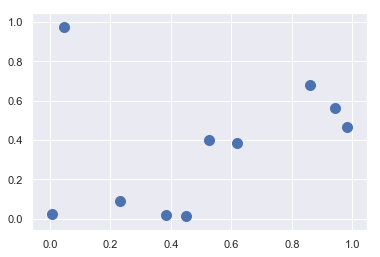

In [82]:
# 示列：K个最近邻
# 以下示例展示的是如何利用argsort函数沿着多个轴快速找到集合中每个点的最近邻。首先，在二维平面上创建一个有10个随机点的集合。
# 按照惯例，将这些数据点放在一个10×2的数组中：
X=rand.rand(10,2)
#print(X)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set() #设置画图风格
plt.scatter(X[:,0],X[:,1],s=100)

In [89]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2,axis =-1)

In [92]:
# : # 在坐标系中计算每对点的差值
differences = X[:,np.newaxis]-X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [93]:
# # 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [94]:
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [95]:
# 请再次确认以上步骤，应该看到该矩阵的对角线（也就是每个点到其自身的距离）的值都是0：
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
# 结果确实是这样的！当我们有了这样一个转化为两点间的平方距离的矩阵后，
# 就可以使用np.argsort函数沿着每行进行排序了。最左边的列给出的索引值就是最近邻：
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [97]:
# 用可以用np.argpartition函数实现k个最近邻

K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

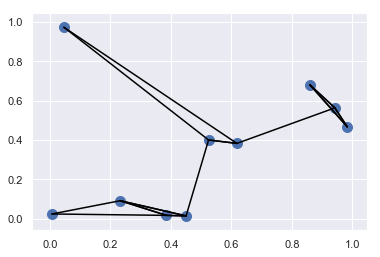

In [99]:
plt.scatter(X[:,0],X[:,1],s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')

#              大O标记
    大O标记是一种描述一个算法对于相应的输入数据的大小需要执行的操作步骤数。要想正确使用它，需要深入理解计算机科学理论，并且将其和小o标记、大θ标记、大Ω标记以及其他混合变体区分开。虽然区分这些概念可以提高算法复杂度计量的准确性，但是除了在计算机科学理论和学究的博客评论外，实际中很少有这种区分。在数据科学中，更常见的还是不太严谨的大O标记——一种通用的（或许是不准确的）算法复杂度的度量描述。在这里要向相关的理论学家和学者致歉，本书中都会使用这种表述方式。
    如果不用太严谨的眼光看待大O标记，那么它其实是告诉你：随着输入数据量的增长，你的算法将花费多少时间。如果你有一个<图>[N]（读作“N阶”）复杂度的算法，该算法花费1秒钟来执行一个长度为N= 1000的列表，那么它执行一个长度为N= 5000的列表花费的时间大约是5秒钟。如果你有一个算法复杂度为<图>[N2]（读作“N的平方阶”），且该算法花费1秒钟来执行一个长度为N= 1000的列表，那么它执行一个长度为N= 5000的列表花费的时间大约是25秒钟。
    在计算算法复杂度时，N通常表示数据集的大小（数据点的个数、维度的数目等）。当我们试图分析数十亿或数百万亿的数据时，算法复杂度为<图>[N]和算法复杂度为<图>[N2]会有非常明显的差别！
    需要注意的是，大O标记并没有告诉你计算的实际时间，而仅仅告诉你改变N的值时，运行时间的相应变化。通常情况下，<图>[N]复杂度的算法比<图>[N2]复杂度的算法更高效。但是对于小数据集，算法复杂度更优的算法可能未必更快。例如对于给定的问题，<图>[N2]复杂度的算法可能会花费0.01秒，而更“优异”的<图>[N]复杂度的算法可能会花费1秒。按照1000的因子将N倍增，那么<图>[N]复杂度的算法将胜出。
    即使是这个非严格版本的大O标记对于比较算法的性能也是非常有用的。我们将在本书中用这个标记来测量算法复杂度。